In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
file_Name = "Northern Branch Phase II Debris Removal Ops.xlsx"

In [3]:
df = pd.read_excel(file_Name)
df.head()

,APN,Structural Status,Haz Tree Only,# of Trees,Haz Trees Assessment,Haz Trees,Hazard Tree Status,Street #,Unit #,Street Name,...,Tree Eligibility (Butte/Shasta/Trinity/Siskiyou),Trinity Lease Lots Eligibility,Hazard Tree Work Package,Tree Felling Complete,Tree Removal Complete,Number of Hazard Trees Felled,Trees Final Site Walk,Modified Date,duplicate,Sync Status
0,062-130-003-000,Ready for Tree Operations,1.0,146.0,2021-05-07,Yes,Hazard Trees Felled,062-130-003-000,NaN,001.80 AC SEC 27 T21N R5E,...,Butte Eligible,NaN,Butte_WP_09,2021-06-14,NaT,144.0,NaN,2021-07-06 16:42:12,NaN,NaN
1,071-300-001-000,Ineligible,1.0,0.0,2021-06-02,No,No Hazard Trees,071-300-001-000,NaN,001.94 AC SEC 36 T20N R5E,...,Butte Eligible,NaN,NaN,NaT,NaT,NaN,NaN,2021-07-06 16:42:12,NaN,NaN
2,071-290-028-000,Ready for Tree Operations,1.0,2.0,2021-04-24,Yes,Hazard Trees Felled,071-290-028-000,NaN,002.30 AC SEC 36 T20N R5E,...,Butte Eligible,NaN,Butte_WP_06,2021-06-21,NaT,2.0,NaN,2021-07-06 16:42:12,NaN,NaN
3,071-200-048-000,Ready for Tree Operations,1.0,5.0,2021-04-24,Yes,Hazard Trees Felled,071-200-048-000,NaN,002.50 AC SEC 29 T20N R6E,...,Butte Eligible,NaN,Butte_WP_06,2021-06-18,NaT,5.0,NaN,2021-07-06 16:42:12,NaN,NaN
4,062-760-009-000,Ready for Tree Operations,1.0,14.0,2021-06-29,Yes,Hazard Trees Assessed,062-760-009-000,NaN,003.20 AC SEC 34 T21N R5E,...,Butte Eligible,NaN,Butte_WP_14,NaT,NaT,NaN,NaN,2021-07-08 20:45:46,NaN,NaN


In [ ]:
df.dtypes

In [ ]:
df.columns.to_list()

In [4]:
df.loc[:, ['Number of Vehicles', 'Number of Vehicles Removed']] = df.loc[:, ['Number of Vehicles', 'Number of Vehicles Removed']].fillna(0)

In [5]:
df['Number of Vehicles'].dtypes

dtype('float64')

In [6]:
df['Number of Vehicles Removed'].dtypes

dtype('O')

covert Number of vehicles object to a int or float category

In [7]:
df['Number of Vehicles Removed'] = pd.to_numeric(df['Number of Vehicles Removed'], errors='coerce')

In [8]:
df['Number of Vehicles Removed'].dtype

dtype('float64')

Create a new column with vehicles left over

In [9]:
df.loc[:, 'Vehicle Left'] =  df.loc[:, 'Number of Vehicles'] - df.loc[:, 'Number of Vehicles Removed']

In [ ]:
dfVecfilt = df[['Number of Vehicles','Number of Vehicles Removed', 'County','Vehicle Left']].groupby('County').sum()
dfVecfilt

In [ ]:
dfVecfilt.plot(kind='bar', figsize=(25,10))

# Make graph above with total for each bar placed on top

In [39]:
df_index = df.groupby(['County']).sum()
df_value = df_index.loc[:, ['Number of Vehicles','Number of Vehicles Removed','Vehicle Left']]

In [ ]:
df_value

In [ ]:
df_index

In [ ]:
df_value.plot(kind='bar', figsize=(25,10))

for i in range(len(df_index)):
    plt.text(i, df_value[i], df_value[i], ha='center', va='bottom')



plt.xticks(rotation=30, horizontalalignment='center')
plt.title("NorthenBranch Fire Vehicle Summary")
plt.ylabel("Counts")
plt.show()

In [80]:
df_index = df.groupby(['County']).sum()

df_value2 = df_index.loc[:, 'Number of Vehicles']
df_value3 = df_index.loc[:, 'Number of Vehicles Removed']
df_value4 = df_index.loc[:, 'Vehicle Left']

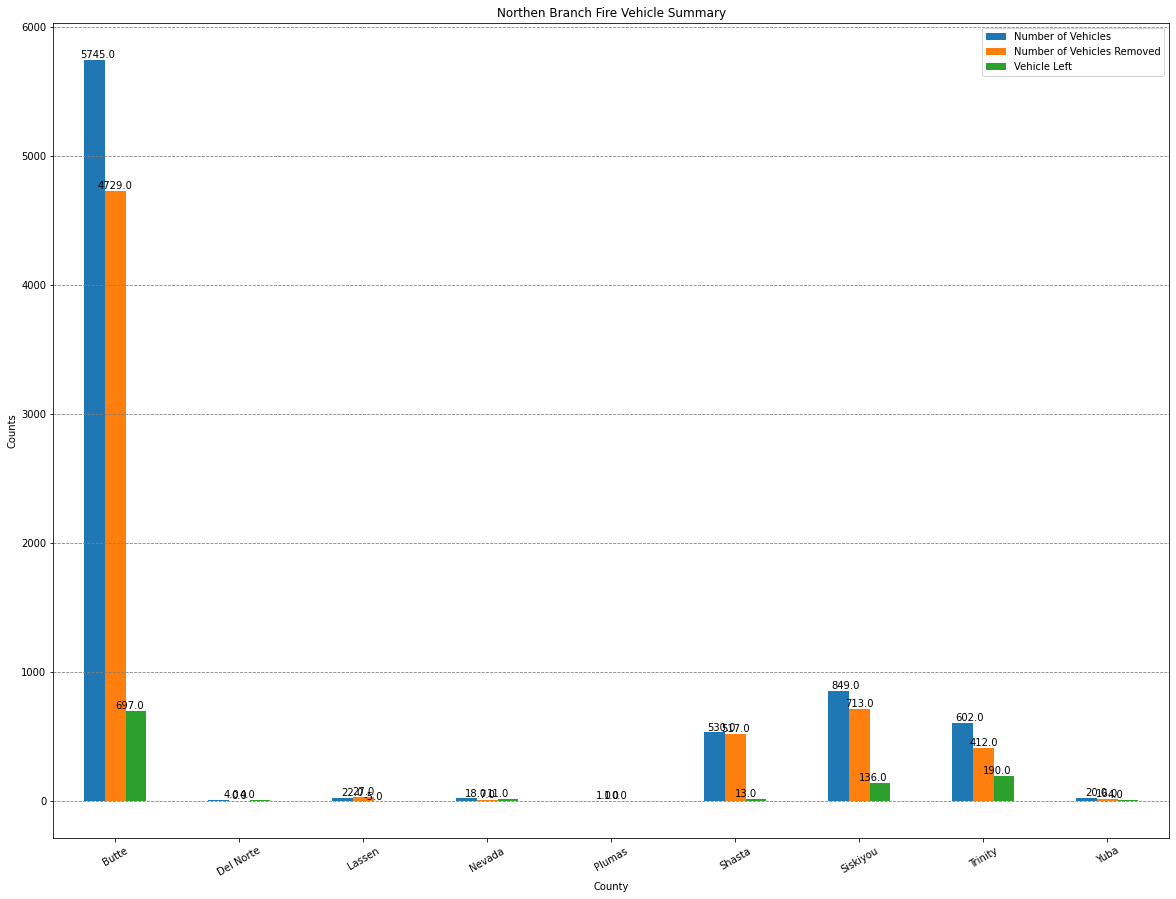

In [154]:
df_value.plot(kind='bar',  figsize=(20,15))

for i in range(len(df_index)):
    plt.text(i, df_value2[i], df_value2[i], ha='right', va='bottom')
    plt.text(i, df_value3[i], df_value3[i], ha='center', va='bottom')
    plt.text(i, df_value4[i], df_value4[i], ha='left', va='bottom')
plt.xticks(rotation=30)
plt.title("Northen Branch Fire Vehicle Summary")
plt.ylabel("Counts")
plt.grid(color='gray', linestyle='--', axis='y')
# plt.tight_layout()
plt.show()

In [150]:
for idx, rect in enumerate(df_value2):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2., 1.05* height, df_index[idx], ha='center', va='bottom')
plt.show()

AttributeError: 'float' object has no attribute 'get_height'